In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:06<00:00, 284MB/s]
100% 1.06G/1.06G [00:06<00:00, 178MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [9]:
def process (image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validaion_ds = validation_ds.map(process)

In [10]:
#creating CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding = 'valid',activation = 'relu',input_shape =(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(32,kernel_size =(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(32,kernel_size =(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides = 2,padding = 'valid'))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [13]:
history = model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 1662s 3s/step - loss: 0.6827 - accuracy: 0.6623 - val_loss: 22.2616 - val_accuracy: 0.6133
Epoch 2/10
625/625 [==============================] - 1673s 3s/step - loss: 0.4696 - accuracy: 0.7757 - val_loss: 25.8556 - val_accuracy: 0.7095
Epoch 3/10
625/625 [==============================] - 1683s 3s/step - loss: 0.3874 - accuracy: 0.8232 - val_loss: 71.0487 - val_accuracy: 0.5862
Epoch 4/10
625/625 [==============================] - 1701s 3s/step - loss: 0.3036 - accuracy: 0.8651 - val_loss: 119.6696 - val_accuracy: 0.6914
Epoch 5/10
625/625 [==============================] - 1690s 3s/step - loss: 0.2069 - accuracy: 0.9140 - val_loss: 69.2710 - val_accuracy: 0.7003
Epoch 6/10
625/625 [==============================] - 1676s 3s/step - loss: 0.1391 - accuracy: 0.9480 - val_loss: 78.9077 - val_accuracy: 0.7858
Epoch 7/10
625/625 [==============================] - 1710s 3s/step - loss: 0.0901 - accuracy: 0.9668 - val_loss: 339.9471 - val_

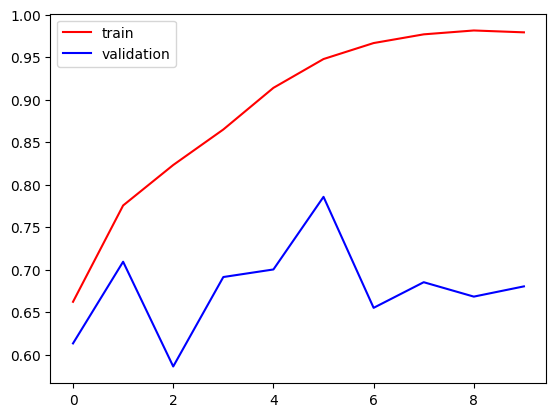

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

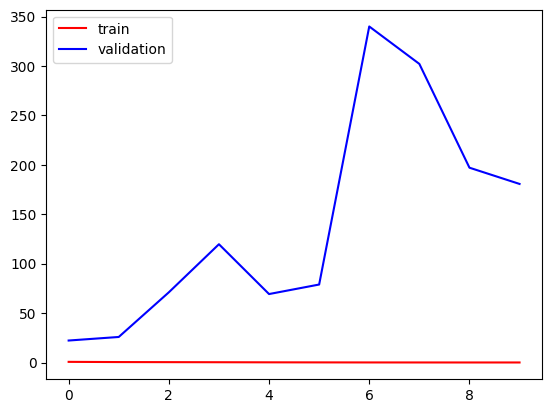

In [15]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

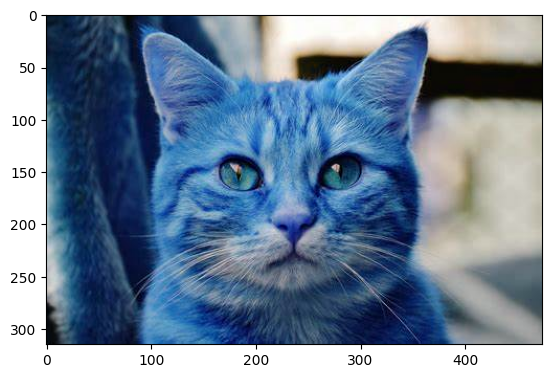

In [16]:
import cv2
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(test_img)

In [21]:
test_img.shape

(256, 256, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))


In [19]:
test_input = test_img.reshape(1,256,256,3)

In [20]:
model.predict(test_input)

1/1 [==============================] - 0s 279ms/step


array([[1.]], dtype=float32)